# SECTION 1

# Question:
### Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

### 1. Classify if a customer is going to churn or not
### 2. Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## EDA and Visualization

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')

In [4]:
df.shape

(10000, 14)

### Inference: The Dataset has 10000 rows with 14 attributes.

### To print the first 5 rows from the beginning

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check columns list and missing values

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Get unique count for each variable

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Inference: From the above, we will not require the first 2 attributes as they are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this.

In [8]:
# Drop the columns as mentioned above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check variable data types

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### General Statistics of the Dataset as in plotting 5 point summary

Text(0.5, 1.0, 'General Statistics of Bank Churn Dataset')

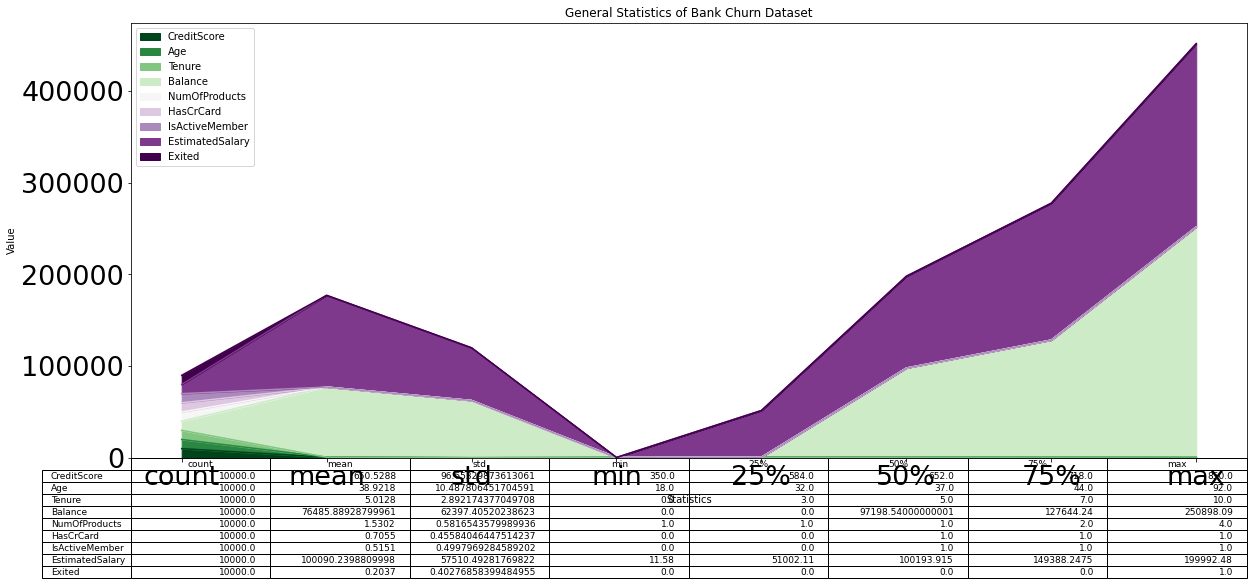

In [11]:
import matplotlib.pyplot as plt
df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="PRGn_r")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Bank Churn Dataset")

### Heatmap to show the correlation between variables or features

<AxesSubplot:>

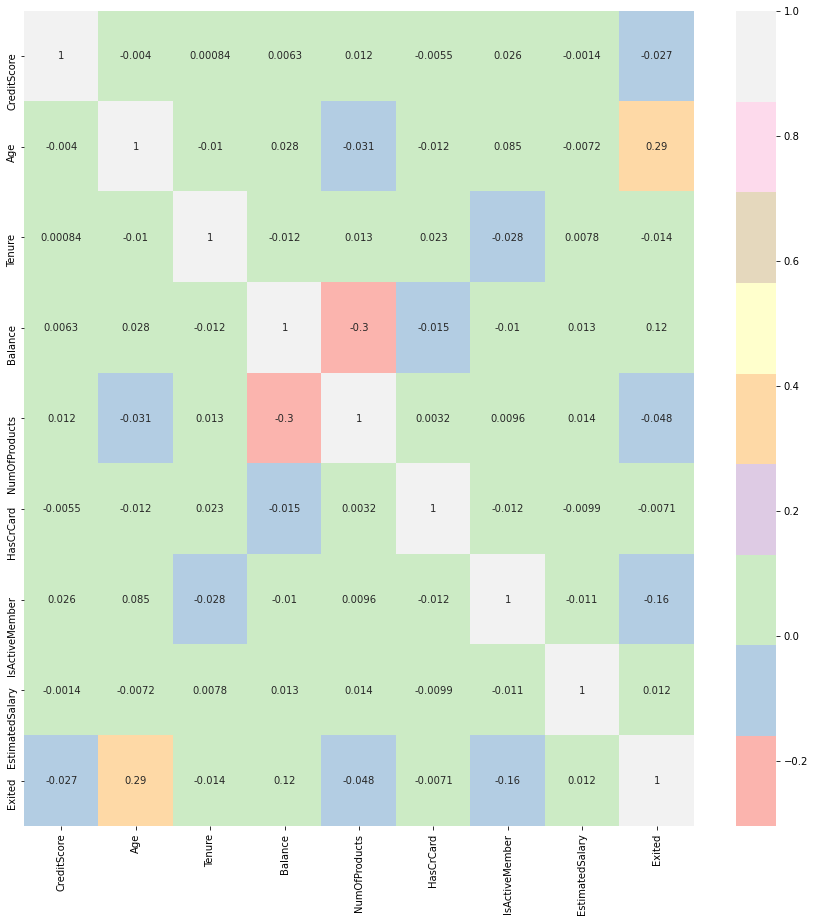

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')

### Pairplot of the Dataset

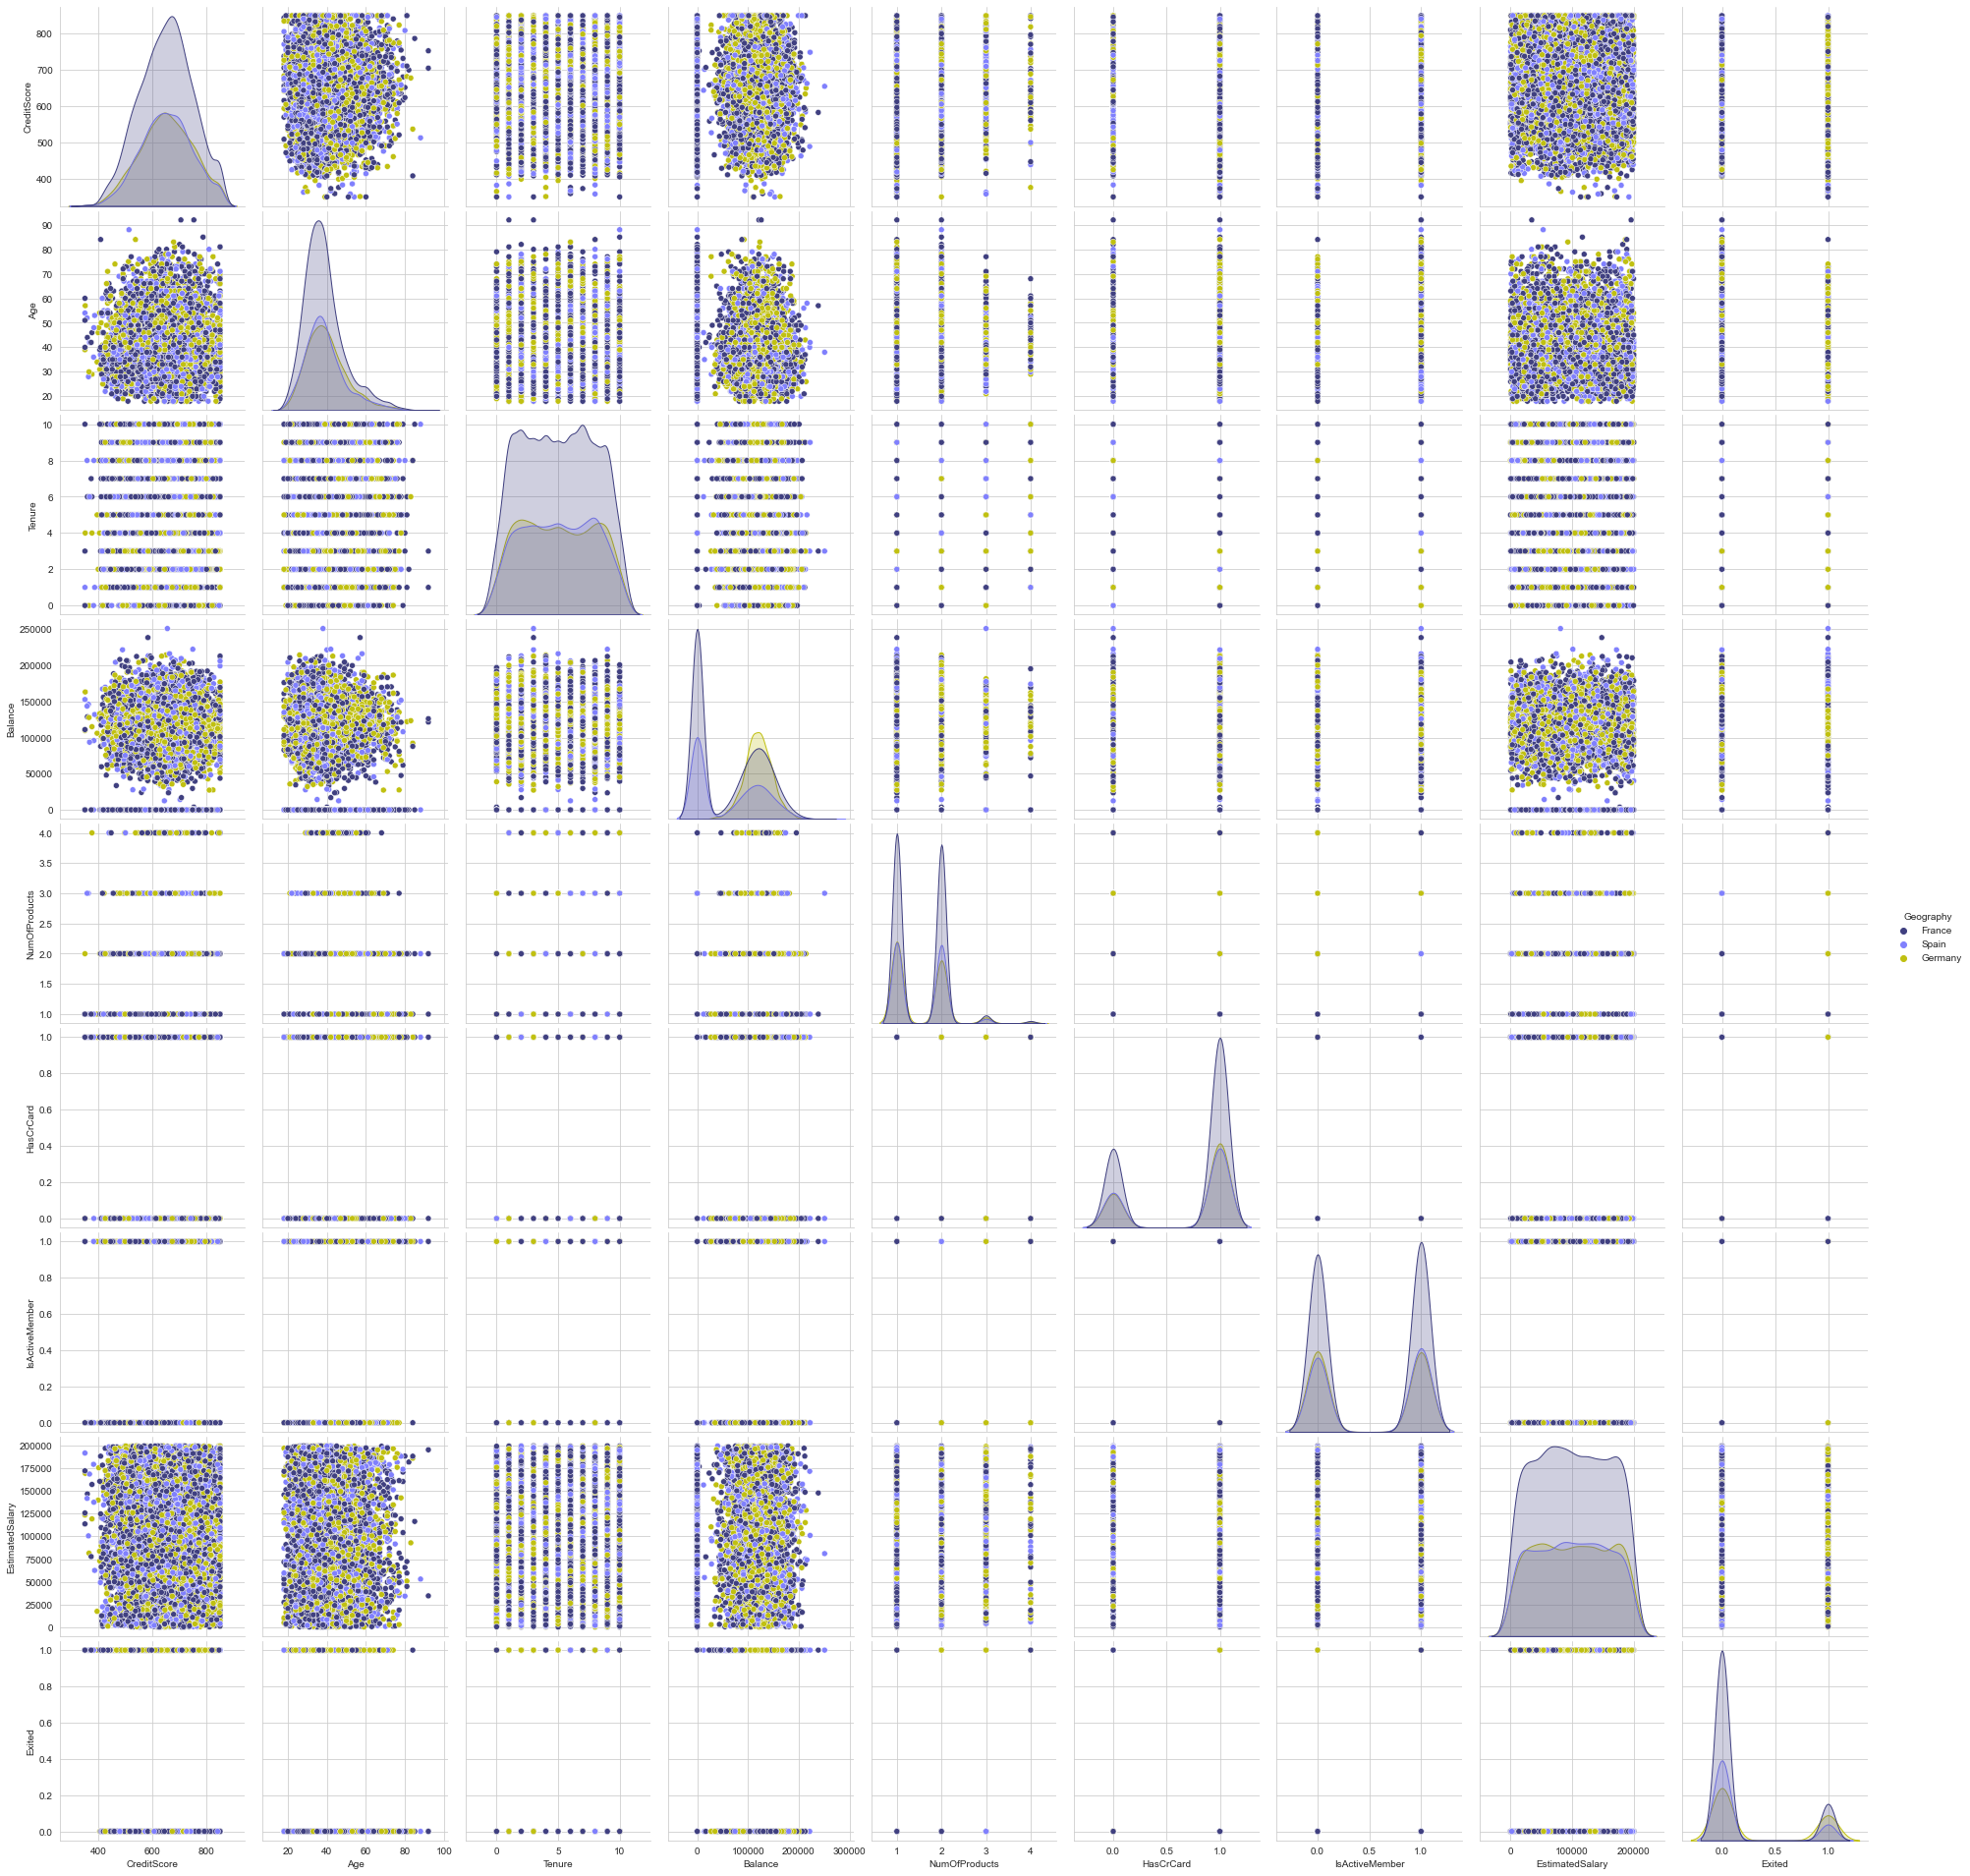

In [13]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="Geography",height=3,palette="gist_stern");
plt.show()

### Pie Chart

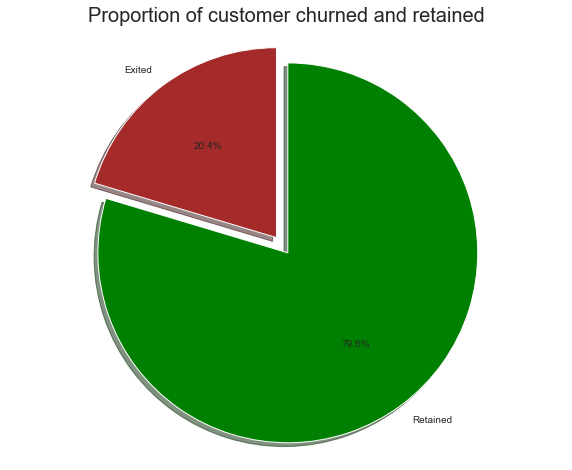

In [16]:
labels = 'Exited', 'Retained'
colors=['Brown','dark green']
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Inference: So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

###  Reviewing the 'Status' relation with categorical variables

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

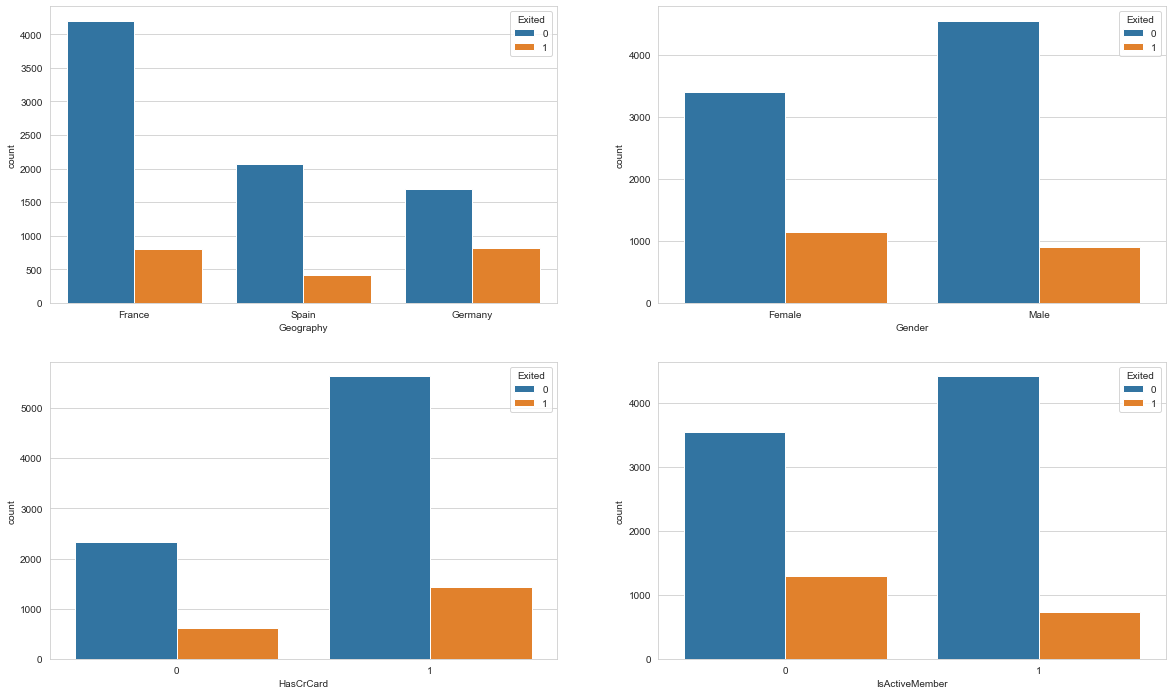

In [17]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Inference:

BarPlot-1: Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.<br>
BarPlot-2: The proportion of female customers churning is also greater than that of male customers.<br>
BarPlot-3: Majority of the customers that churned are those with credit cards.<br>
BarPlot-4: The inactive members have a greater churn. Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definitely have a positive impact on the customer churn.

 ### Relations based on the continuous data attributes

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

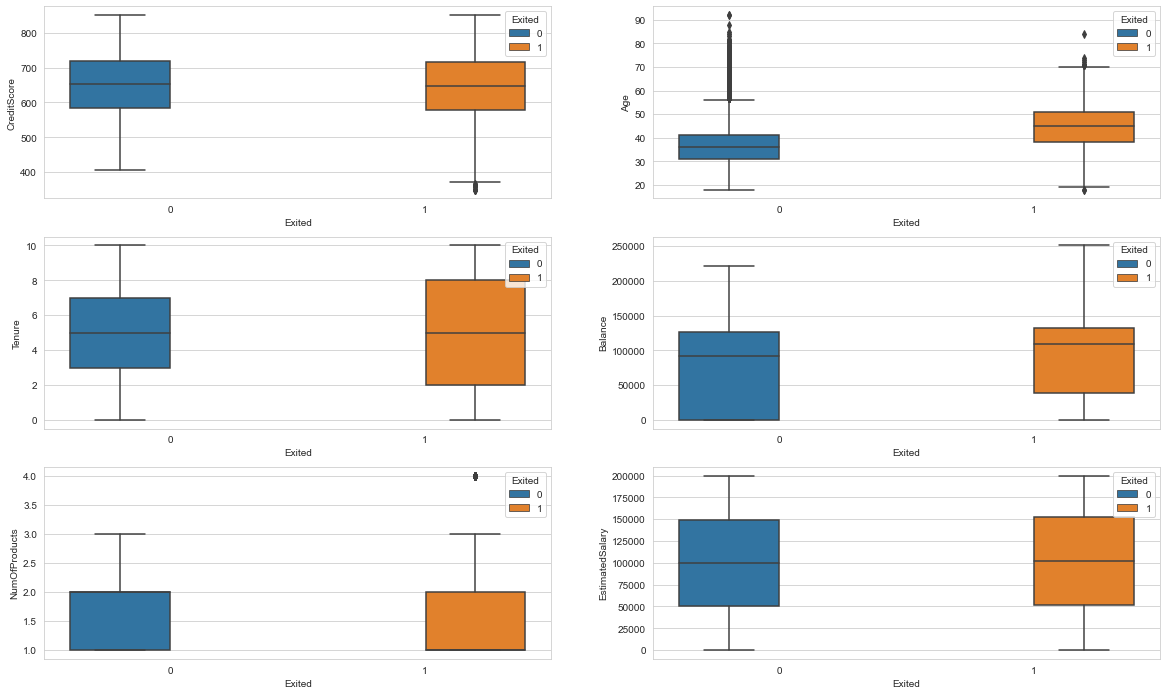

In [18]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### Inference:

BoxPlot 1: There is no significant difference in the credit score distribution between retained and churned customers.<br>
BoxPlot 2: The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.<br>
BoxPlot 3: With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.<br>
BoxPlot 4: The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.<br>
BoxPlot 5 and BoxPlot 6: Neither the product nor the salary has a significant effect on the likelihood to churn.

### Violin plots

<AxesSubplot:xlabel='Geography', ylabel='NumOfProducts'>

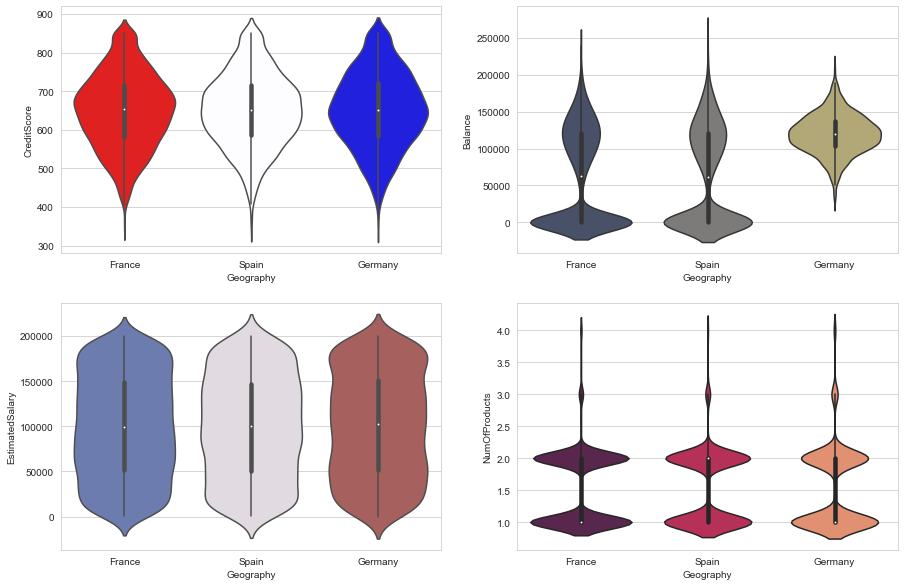

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Geography',y='CreditScore',data=df,palette="seismic_r")
plt.subplot(2,2,2)
sns.violinplot(x='Geography',y='Balance',data=df,palette="cividis")
plt.subplot(2,2,3)
sns.violinplot(x='Geography',y='EstimatedSalary',data=df,palette="twilight_shifted")
plt.subplot(2,2,4)
sns.violinplot(x='Geography',y='NumOfProducts',data=df,palette="rocket")

## Feature Engineering

### Splitting the dataset with 80:20 ratio

In [74]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

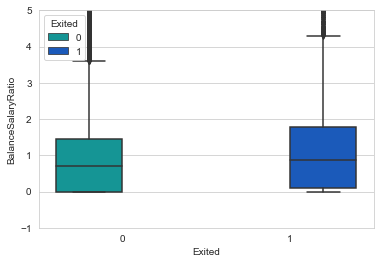

In [75]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train,palette="winter_r")
plt.ylim(-1, 5)

### Inference: We have seen above that the salary has little effect on the chance of a customer churning. However, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

### Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age.

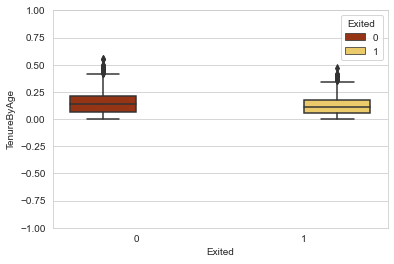

In [76]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train,palette="afmhot")
plt.ylim(-1, 1)
plt.show()

### A variable to capture credit score given age to take into account credit behavior vs adult life

In [77]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [78]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


## Data Preparation for Model Fitting

### Arrange columns by data type for easier manipulation

In [79]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


### For the one hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0

In [80]:
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


### One hot encode for the categorical variables

In [81]:
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

<ipython-input-81-4cb31d6357b6>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-81-4cb31d6357b6>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


### minMax scaling the continuous variables

In [82]:
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Data preparation pipeline for test data

In [84]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [85]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(1996, 17)

## Without HyperParameter Tuning

### Training Model without HyperParameter Tuning with corresponding Classification Reports

In [164]:
dt = DecisionTreeClassifier()
random = RandomForestClassifier()
logreg = LogisticRegression()
models = [dt,logreg, random]

accuracy={}
for model in models:
    print('\033[1m'+"Classification Report for: ",model)
    m1=model.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    # Predict the Test set results
    pred = m1.predict(df_test.loc[:, df_test.columns != 'Exited'])
    accuracy[str(model)]=accuracy_score(df_test.Exited,pred)
    print(classification_report(df_test.Exited, pred, digits=3))
    print("--------------------------------------------------------")

Classification Report for:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0      0.870     0.805     0.836      1607
           1      0.385     0.504     0.437       389

    accuracy                          0.746      1996
   macro avg      0.628     0.655     0.636      1996
weighted avg      0.776     0.746     0.759      1996

--------------------------------------------------------
Classification Report for:  LogisticRegression()


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0      0.818     0.991     0.896      1607
           1      0.714     0.090     0.160       389

    accuracy                          0.816      1996
   macro avg      0.766     0.541     0.528      1996
weighted avg      0.798     0.816     0.753      1996

--------------------------------------------------------
Classification Report for:  RandomForestClassifier()
              precision    recall  f1-score   support

           0      0.866     0.974     0.917      1607
           1      0.781     0.375     0.507       389

    accuracy                          0.858      1996
   macro avg      0.823     0.675     0.712      1996
weighted avg      0.849     0.858     0.837      1996

--------------------------------------------------------


### Accuracy of all the models without HyperParameter Tuning

In [165]:
accuracy

{'DecisionTreeClassifier()': 0.7464929859719439,
 'LogisticRegression()': 0.8156312625250501,
 'RandomForestClassifier()': 0.8577154308617234}

### So four models are trained with HyperParameter Tuning, those are:
### ~ Logistic Regression with Primal Space and with different Kernels 
### ~ Ensemble Models:
        --> Decision Tree Classifier
        --> Random Forest Classifier

## With HyperParameter Tuning

### Function to give best model score and parameters

In [111]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

### Model 1: Primal Logistic Regression with Hyperparameter Tuning

In [112]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

0.8149999999999998
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


### Model 2: Logistic Regression with Degree 2 Polynomial Kernel with Hyperparameter Tuning

In [113]:
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
best_model(log_pol2_Grid)

0.8553750000000001
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


### Model 3: Random Forest Classifier with Hyperparameter Tuning

In [114]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

0.8631249999999999
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 6, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=6,
                       n_estimators=50)


### Model 4: Decision Tree Classifier with Hyperparameter Tuning

In [115]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'min_samples_split': [3, 5, 6, 7]}
Dec_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, refit=True, verbose=0)
Dec_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(Dec_grid)

0.8545000000000001
{'max_depth': 7, 'max_features': 8, 'min_samples_split': 7}
DecisionTreeClassifier(max_depth=7, max_features=8, min_samples_split=7)


## Fitting best Models which we got with Hyperparameter Tuning

### Fitting Primal Logistic Regression with the optimum parameters we received through GridSearchCV Hyperparameter Tuning

In [116]:
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='ovr',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, multi_class='ovr', tol=1e-05)

In [119]:
print("Classification Report for Primal Logistic Regression:\n",classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for Primal Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



### Fitting Logistic Regression with polynomial degree 2 Kernel with the optimum parameters we received through GridSearchCV Hyperparameter Tuning

In [120]:
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)

LogisticRegression(C=10, max_iter=300, multi_class='ovr', solver='liblinear')

In [123]:
print("Classification Report for Degree 2 Polynomial Kernel Logistic Regression:\n",classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

Classification Report for Degree 2 Polynomial Kernel Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



### Fitting Random Forest Classifier with the optimum parameters we received through GridSearchCV Hyperparameter Tuning

In [121]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [125]:
print("Classification Report for Random Forest Classifier:\n",classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.89      0.52      0.65      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.87      8000



### Fitting Decision Tree Classifier with the optimum parameters we received through GridSearchCV Hyperparameter Tuning

In [124]:
# Fit Decision Tree classifier
DC = DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0,random_state=None)
DC.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

DecisionTreeClassifier(max_depth=8, max_features=6, min_samples_split=3)

In [126]:
print("Classification Report for Decision Tree Classifier:\n",classification_report(df_train.Exited,  DC.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92      6353
           1       0.79      0.52      0.63      1647

    accuracy                           0.87      8000
   macro avg       0.84      0.74      0.78      8000
weighted avg       0.87      0.87      0.86      8000



### Comparing the Accuracies and sorting them for all the models we've built so far: 

In [167]:
accuracy1={"Primal Logistic Regression with Hyperparameter Tuning":accuracy_score(df_train.Exited,  log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])),
           "Logistic Regression with Degree 2 Polynomial Kernel":accuracy_score(df_train.Exited,  log_pol2.predict(df_train_pol2)),
           "Decision Tree Classifier with Hyperparameter Tuning":accuracy_score(df_train.Exited,  DC.predict(df_train.loc[:, df_train.columns != 'Exited'])),
           "Random Forest Classifier with Hyperparameter Tuning":accuracy_score(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited']))
          }
accuracy.update(accuracy1)

In [168]:
accuracy

{'DecisionTreeClassifier()': 0.7464929859719439,
 'LogisticRegression()': 0.8156312625250501,
 'RandomForestClassifier()': 0.8577154308617234,
 'Primal Logistic Regression with Hyperparameter Tuning': 0.8155,
 'Logistic Regression with Degree 2 Polynomial Kernel': 0.8605,
 'Decision Tree Classifier with Hyperparameter Tuning': 0.8735,
 'Random Forest Classifier with Hyperparameter Tuning': 0.886875}

In [169]:
newacc = pd.DataFrame.from_dict(accuracy,orient ='index')

### Sorting the accuracies for all the models from aescending to descending order

In [170]:
newacc.sort_values(by=[0])

,0
DecisionTreeClassifier(),0.746493
Primal Logistic Regression with Hyperparameter Tuning,0.815500
LogisticRegression(),0.815631
RandomForestClassifier(),0.857715
Logistic Regression with Degree 2 Polynomial Kernel,0.860500
Decision Tree Classifier with Hyperparameter Tuning,0.873500
Random Forest Classifier with Hyperparameter Tuning,0.886875


### Inference: From this we got to know that Random Forest with Hyperparameter Tuning is giving the highest accuracy therefore we will go on with this model for further process.

## Plotting Models with Hyperparameter Tuning

In [160]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_DC, fpr_DC, tpr_DC = get_auc_scores(y, DC.predict(X),DC.predict_proba(X)[:,1])

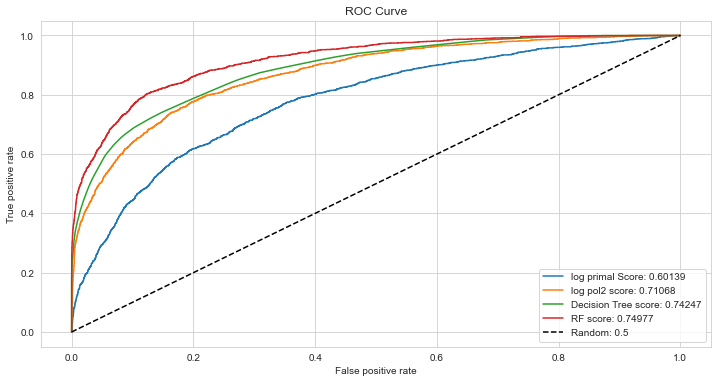

In [161]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5))) 
plt.plot(fpr_DC, tpr_DC, label = 'Decision Tree score: ' + str(round(auc_DC, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Inference: From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest with hyperparameter tuning where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

### From the above Accuracy Table we got to know Random Forest with Hyperparameter Tuning is giving the highest accuracy, so will go on with it.

In [162]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.42      0.55       389

    accuracy                           0.86      1996
   macro avg       0.83      0.70      0.73      1996
weighted avg       0.86      0.86      0.85      1996



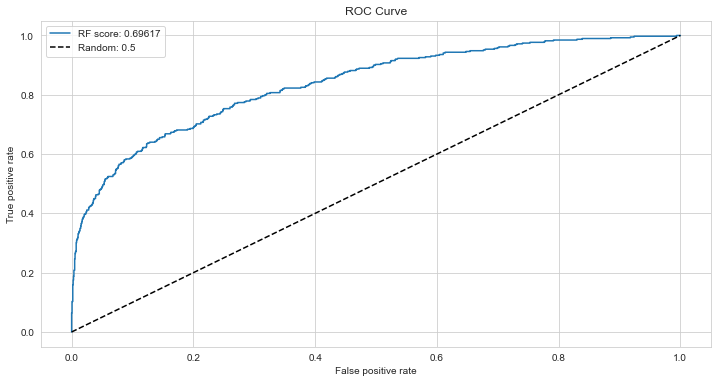

In [163]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# SECTION 3

## USER INPUT MODULE

In [193]:
df_train.head(50)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1
3987,0,0.566,0.256757,0.7,0.564159,0.000000,0.624005,0.000855,0.340541,0.291469,1,1,-1,1,-1,-1,1
3300,1,0.654,0.135135,0.0,0.573890,0.333333,0.043349,0.012401,0.000000,0.459687,1,-1,-1,-1,1,-1,1
370,0,0.902,0.324324,0.4,0.565758,0.000000,0.052567,0.010100,0.171429,0.338180,1,1,1,-1,-1,-1,1
7647,0,0.836,0.094595,0.0,0.312462,0.000000,0.041151,0.007109,0.000000,0.615317,1,1,-1,1,-1,-1,1
4763,0,0.804,0.270270,0.0,0.581809,0.333333,0.688357,0.000799,0.000000,0.355263,1,1,-1,1,-1,-1,1


In [194]:
import easygui
easygui.msgbox(msg='Now we will collect information regarding all the variables to identify whether the bank user is going to churn or not!!', title='BANK CHURN ANALYSIS', ok_button='OK', image='churn.jpg', root=None)

'OK'

In [195]:
import PySimpleGUI as sg

In [196]:
sg.theme('BluePurple')
    
layout = [[sg.Text('Enter Your CreditScore: '), ],
          [sg.Input('')],
          [sg.Text('', size=(20, 1), key='-OUTPUT-')],
          [sg.Button('Next >'), sg.Button('Exit')]]

window1 = sg.Window('CreditScore Input', layout)

window3_active = window2_active = window4_active = window5_active=window6_active=window7_active=window8_active=window9_active=window10_active=window11_active=window12_active=window13_active=window14_active=window15_active=window16_active=window17_active=False
c=0
while True:
    if not window2_active:
        event1, values1 = window1.read()
        cs=values1
        
        if event1 in  (None, 'Exit'):
            c=1
            break

            
    if not window2_active and event1 == 'Next >':
        window2_active = True
        window1.hide()
        layout2 = [[sg.Text('Enter Your Age: '), ],
                   [sg.Input('')],
                   [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                   [sg.Button('< Prev'), sg.Button('Next >')]]

        window2 = sg.Window('Age Input', layout2)
         
    if window2_active:
        event2, values2 = window2.read()
        age=values2
        
        if event2 in (None, 'Exit', '< Prev'):
            window2_active = False
            window2.close()
            window1.un_hide()
        elif event2 == 'Next >':
            window3_active = True
            window2_active = False
            window2.hide()
            layout3 = [[sg.Text('Enter the Tenure: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window3 = sg.Window('Tenure Input', layout3)
     
    if window3_active:
        event3, values3 = window3.read()
        ten=values3
        if event3 == '< Prev':
            window3.close()
            window3_active = False
            window2_active = True
            window2.un_hide()
        elif event3 == 'Next >':
            window4_active = True
            window3_active = False
            window3.hide()
            layout4 = [[sg.Text('Enter Your Balance: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window4 = sg.Window('Balance Input', layout4)
            
    if window4_active:
        event4, values4 = window4.read()
        bal=values4
        if event4 == '< Prev':
            window4.close()
            window4_active = False
            window3_active = True
            window3.un_hide()
        elif event4 == 'Next >':
            window5_active = True
            window4_active = False
            window4.hide()
            layout5 = [[sg.Text('Enter Number of Products: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window5 = sg.Window('Products Input', layout5)
            
    if window5_active:
        event5, values5 = window5.read()
        prod=values5
        if event5 == '< Prev':
            window5.close()
            window5_active = False
            window4_active = True
            window4.un_hide()
        elif event5 == 'Next >':
            window6_active = True
            window5_active = False
            window5.hide()
            layout6 = [[sg.Text('Enter Estimated Salary: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window6 = sg.Window('Estimated Salary Input', layout6)
    
    if window6_active:
        event6, values6 = window6.read()
        es=values6
        if event6 == '< Prev':
            window6.close()
            window6_active = False
            window5_active = True
            window5.un_hide()
        elif event6 == 'Next >':
            window7_active = True
            window6_active = False
            window6.hide()
            layout7 = [[sg.Text('HasCreditCard: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window7 = sg.Window('HasCreditCard Input', layout7)
    
    if window7_active:
        event7, values7 = window7.read()
        hcard=values7
        if event7 == '< Prev':
            window7.close()
            window7_active = False
            window6_active = True
            window6.un_hide()
        elif event7 == 'Next >':
            window8_active = True
            window7_active = False
            window7.hide()
            layout8 = [[sg.Text('IsActiveMember: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window8 = sg.Window('IsActiveMember Input', layout8)
    
    if window8_active:
        event8, values8 = window8.read()
        isa=values8
        if event8 == '< Prev':
            window8.close()
            window8_active = False
            window7_active = True
            window7.un_hide()
        elif event8 == 'Next >':
            window9_active = True
            window8_active = False
            window8.hide()
            layout9 = [[sg.Text('Resident of Spain: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window9 = sg.Window('Geography_Spain Input', layout9)
            
    if window9_active:
        event9, values9 = window9.read()
        spain=values9
        if event9 == '< Prev':
            window9.close()
            window9_active = False
            window8_active = True
            window8.un_hide()
        elif event8 == 'Next >':
            window10_active = True
            window9_active = False
            window9.hide()
            layout10 = [[sg.Text('Resident of France: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window10 = sg.Window('Geography_France Input', layout10)    
    
    if window10_active:
        event10, values10 = window10.read()
        france=values10
        if event10 == '< Prev':
            window10.close()
            window10_active = False
            window9_active = True
            window9.un_hide()
        elif event10 == 'Next >':
            window11_active = True
            window10_active = False
            window10.hide()
            layout11 = [[sg.Text('Resident of Germany: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window11 = sg.Window('Geography_Germany Input', layout11) 
            
    if window11_active:
        event11, values11 = window11.read()
        germany=values11
        if event11 == '< Prev':
            window11.close()
            window11_active = False
            window10_active = True
            window10.un_hide()
        elif event11 == 'Next >':
            window12_active = True
            window11_active = False
            window11.hide()
            layout12 = [[sg.Text('Are you Female: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Next >')]]
            window12 = sg.Window('Female Input', layout12) 
            
    if window12_active:
        event12, values12 = window12.read()
        female=values12
        if event12 == '< Prev':
            window12.close()
            window12_active = False
            window11_active = True
            window11.un_hide()
        elif event12 == 'Next >':
            window13_active = True
            window12_active = False
            window12.hide()
            layout13 = [[sg.Text('Male Input: ')],
                       [sg.Input('')],
                       [sg.Text('', size=(20, 1), key='-OUTPUT-')],
                       [sg.Button('< Prev'), sg.Button('Exit')]]
            window13 = sg.Window('Male Input', layout13) 
            
    if window13_active:
        event13, values13 = window13.read()
        male=values13
        if event13 == '< Prev':
            window13.close()
            window13_active = False
            window12_active = True
            window12.un_hide()
        elif event13 in (None, 'Exit'):
            c=2
            break
            
if c==1:
    window1.close()
elif c==2:
    window13.close()

In [192]:
df_train.columns

Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Geography_Spain',
       'Geography_France', 'Geography_Germany', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [203]:
newui=pd.DataFrame(columns= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Geography_Spain',
       'Geography_France', 'Geography_Germany', 'Gender_Female',
       'Gender_Male'])

salbalr=(float(bal[0])/float(es[0]))
ta=(float(ten[0])/float(age[0]))
ca=(float(cs[0])/float(age[0]))

ui = {"CreditScore": float(cs[0]), "Age": float(age[0]), "Tenure": float(ten[0]),"Balance": float(bal[0]),"NumOfProducts": float(prod[0]),"EstimatedSalary": float(es[0]),"BalanceSalaryRatio":salbalr,"TenureByAge":ta,"CreditScoreGivenAge":ca,"HasCrCard": int(hcard[0]),"IsActiveMember": int(isa[0]),"Geography_Spain": int(spain[0]),"Geography_France": int(france[0]),"Geography_Germany": int(germany[0]),"Gender_Female": int(female[0]),"Gender_Male": int(male[0])}

newui = newui.append(ui, ignore_index=True)

In [204]:
newui

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
0,0.588,0.093891,0.3,0.383115,0.343434,0.426012,0.899306,3.195194,6.262581,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0


In [205]:
newpred=RF.predict(newui)

In [208]:
print("The Exited Value indicating if user is going to churn or not is: ")
if newpred==1:
    print("The Exited Value is: ",newpred,"\nThe Bank User is not going to churn.")
elif newpred==0:
    print("The Exited Value is: ",newpred,"\nThe Bank User is going to churn.")

The Exited Value indicating if user is going to churn or not is: 
The Exited Value is:  [0] 
The Bank User is going to churn.


# SECTION 4

## Conclusion: 
Concluding the lab: For this lab we had to go with model building using various machine learning techniques starting from data preprocessing, feature engineering, tuning the model, finalising the model based on the highest accuracy.

Overall, a good practice to learn all the techniques and logics and algorithms behind ML models.

# SECTION 5

## Reference Links:
1. https://www.geeksforgeeks.org/introduction-to-pysimplegui/
2. https://github.com/PySimpleGUI/PySimpleGUI/issues/2247
3. https://easygui.readthedocs.io/en/latest/api.html